 `08_clustering/homework_product_cluster_251205.ipynb`에 작성하세요. # 193

## 상품명 기반 군집화 

### 데이터셋
상품 데이터 https://archive.ics.uci.edu/dataset/837/product%2Bclassification%2Band%2Bclustering

### 1. 데이터 로드 및 탐색

**문제 1-1**
`pricerunner_aggregate.csv` 파일을 읽고 `Product Title` 컬럼의 상위 5개를 출력하시오.

**문제 1-2**
상품명이 비어 있거나 결측치인 행이 있는 경우, 해당 행은 삭제하시오.


### 2. 텍스트 전처리

**문제 2-1**
모든 상품명을 소문자로 변환하고, 알파벳과 숫자를 제외한 문자는 모두 제거하여 `clean_title` 컬럼으로 저장하시오.
(힌트: 적절한 정규표현식을 사용해보세요.)

### 3. TfidfVectorizer 벡터화

**문제 3-1**
`TfidfVectorizer(stop_words='english', max_features=1000)`를 사용하여 상품명을 벡터화하시오. 생성된 벡터의 크기(shape)를 출력하시오.

### 4. 최적 클러스터 수 결정 (Silhouette Score)

**문제 4-1**
KMeans를 사용하여 군집 수를 2\~10까지 변화시키며 군집화를 수행하고, Silhouette Score를 계산하시오.
(힌트: `silhouette_score(X, labels)` 사용)

**문제 4-2**
각 클러스터 수에 대한 Silhouette Score를 시각화하여 최적의 클러스터 수를 선택하시오.

### 5. KMeans 클러스터링

**문제 5-1**
선택한 최적 클러스터 수를 기준으로 KMeans를 수행하고, 결과를 `df['cluster']` 컬럼에 저장하시오.


### 6. 2차원 시각화 (보너스)

**문제 6-1**
PCA를 사용하여 벡터를 2차원으로 축소하고, 클러스터별 색을 다르게 하여 시각화하시오.


# 데이터 로드 및 탐색

In [1]:
import pandas as pd
import numpy as np

# 1-1. 데이터 로드 및 상위 5개 출력
df = pd.read_csv('data/pricerunner_aggregate.csv')
print(df['Product Title'].head())

# 1-2. 결측치 및 빈 문자열 제거
initial_len = len(df)
df = df.dropna(subset=['Product Title'])
df = df[df['Product Title'].str.strip() != '']
print(f"Removed {initial_len - len(df)} rows. Final rows: {len(df)}")

0                      apple iphone 8 plus 64gb silver
1                  apple iphone 8 plus 64 gb spacegrau
2    apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...
3                  apple iphone 8 plus 64gb space grey
4    apple iphone 8 plus gold 5.5 64gb 4g unlocked ...
Name: Product Title, dtype: object
Removed 0 rows. Final rows: 35311


# 텍스트 전처리

In [2]:
import re

def clean_text(text):
    text = str(text).lower()  # 소문자 변환
    text = re.sub(r'[^a-z0-9\s]', '', text)  # 알파벳, 숫자, 공백 제외 제거
    return text

df['clean_title'] = df['Product Title'].apply(clean_text)
print(df[['Product Title', 'clean_title']].head())

                                       Product Title  \
0                    apple iphone 8 plus 64gb silver   
1                apple iphone 8 plus 64 gb spacegrau   
2  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...   
3                apple iphone 8 plus 64gb space grey   
4  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...   

                                         clean_title  
0                    apple iphone 8 plus 64gb silver  
1                apple iphone 8 plus 64 gb spacegrau  
2  apple mq8n2ba iphone 8 plus 64gb 55 12mp sim f...  
3                apple iphone 8 plus 64gb space grey  
4  apple iphone 8 plus gold 55 64gb 4g unlocked s...  


# 3. TfidfVectorizer 벡터화

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['clean_title'])

print("Vector shape:", X.shape)

Vector shape: (35311, 1000)


# 4. 최적 클러스터 수 결정 (Silhouette Score)

k=2, Silhouette Score=0.0207
k=3, Silhouette Score=0.0280
k=4, Silhouette Score=0.0360
k=5, Silhouette Score=0.0410
k=6, Silhouette Score=0.0434
k=7, Silhouette Score=0.0534
k=8, Silhouette Score=0.0528
k=9, Silhouette Score=0.0524
k=10, Silhouette Score=0.0587


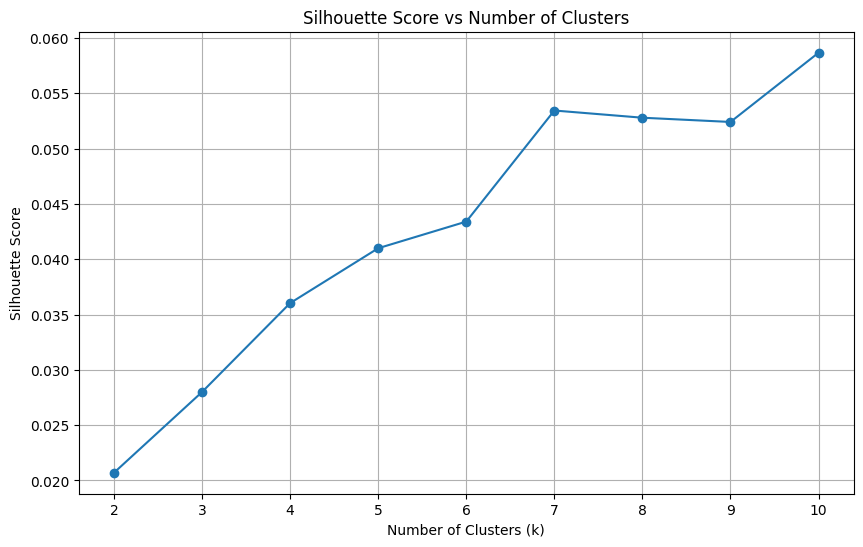

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)

# 계산 시간 단축을 위해 샘플링하여 실루엣 점수 계산 (선택 사항)
from sklearn.utils import resample
X_sample = resample(X, n_samples=5000, random_state=42, replace=False)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    # 전체 데이터에 대한 점수는 계산 비용이 높으므로 샘플 데이터로 평가
    # (실제 코드에서는 전체 X와 labels를 사용해도 되지만 시간이 오래 걸릴 수 있음)
    labels_sample = labels[pd.DataFrame(X.toarray()).sample(5000, random_state=42).index]
    # 위 샘플링 코드는 인덱스 매칭이 복잡하므로 간단히 X_sample에 대해 다시 fit하거나
    # 이미 구한 labels에서 해당 인덱스만 추출해야 합니다.
    # 여기서는 편의상 X_sample에 대해 predict한 결과로 점수를 측정하겠습니다.
    labels_sample_pred = kmeans.predict(X_sample)
    score = silhouette_score(X_sample, labels_sample_pred)
    
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# 5. KMeans 클러스터링

In [5]:
# 최적 k 설정
best_k = 10

kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans_best.fit_predict(X)

print("Clustering complete. Columns:", df.columns)

Clustering complete. Columns: Index(['Product ID', 'Product Title', ' Merchant ID', ' Cluster ID',
       ' Cluster Label', ' Category ID', ' Category Label', 'clean_title',
       'cluster'],
      dtype='object')


# 6. 2차원 시각화 (보너스)

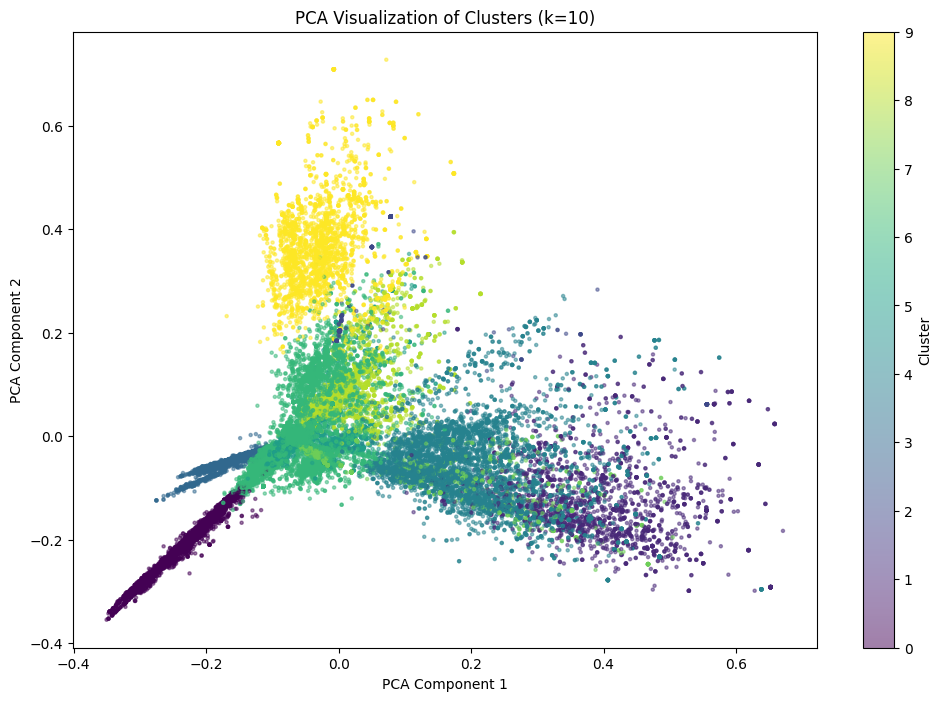

In [6]:
from sklearn.decomposition import PCA

# PCA 차원 축소 (2차원)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# 시각화
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5, s=5)
plt.title(f'PCA Visualization of Clusters (k={best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()